In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics.em import TDEMSmoothModelling, TDEMBlockModelling

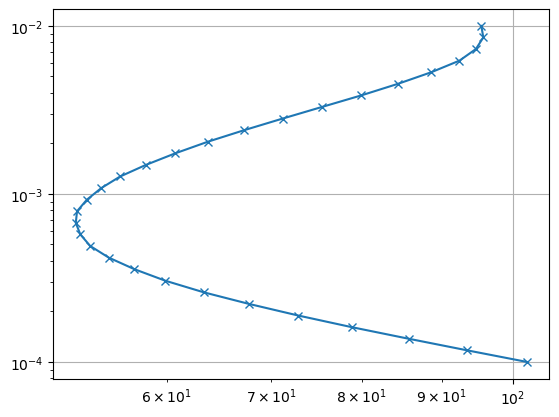

In [26]:
t = np.logspace(-4, -2, 30)
fopkw = dict(times=t, txArea=100**2)
synth = [50, 100, 300, 30, 300]
fopSynth = TDEMBlockModelling(nLayers=(len(synth)+1)//2, **fopkw)
data = fopSynth(synth)
plt.loglog(data, t, "x-")
plt.grid()

In [27]:
thk = np.logspace(0.5, 2, 20)
print(sum(thk))
fop = TDEMSmoothModelling(thk=thk, **fopkw)
inv = pg.Inversion(fop=fop)
inv.dataTrans = pg.trans.TransLog()
inv.modelTrans = pg.trans.TransLog()
model = inv.run(data, relativeError=0.03, blockyModel=True, verbose=True)

25/07/24 - 11:42:31 - pyGIMLi - INFO - Found 1 regions.


25/07/24 - 11:42:31 - pyGIMLi - INFO - Use median(data values)=67.51731043628405
25/07/24 - 11:42:31 - pyGIMLi - INFO - Created startmodel from forward operator: 21, min/max=67.517310/67.517310
25/07/24 - 11:42:31 - pyGIMLi - INFO - Starting inversion.


585.7577398452621
fop: <pygimli.physics.em.tdem.TDEMSmoothModelling object at 0x000002F12F4A05E0>
Data transformation: <pgcore._pygimli_.RTransLog object at 0x000002F12F4A0860>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002F12F4A00E0>
min/max (data): 52.48/102
min/max (error): 3%/3%
min/max (start model): 67.52/67.52
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   54.11
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   24.66 (dPhi = 54.26%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    9.28 (dPhi = 60.84%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.25 (dPhi = 78.20%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    0.12 (dPhi = 54.14%) lam: 20.0


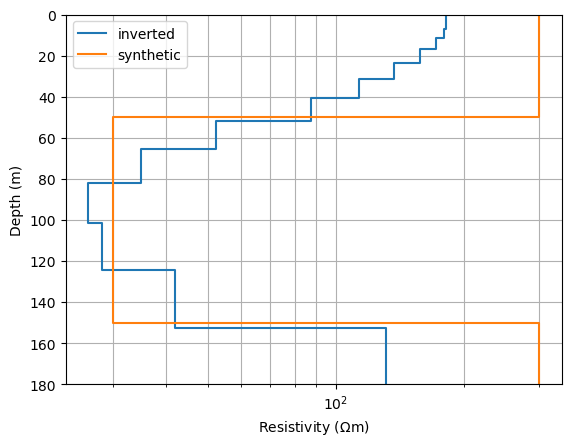

In [28]:
fig, ax = plt.subplots()
pg.viewer.mpl.drawModel1D(ax, plot="semilogx", thickness=thk, values=model, label="inverted")
pg.viewer.mpl.drawModel1D(ax, model=synth, label="synthetic")
ax.grid(which='minor')
ax.legend();